# LEVEL 3

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
data=pd.read_csv("C:/Users/Princia/Downloads/Restaurant Dataset.csv")
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Task 1

In [3]:
#Analyze the text reviews to identify the most common positive and negative keywords.

In [4]:
data['Rating text'].value_counts()

Rating text
Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: count, dtype: int64

In [5]:
mapping_rule={'Average':'Negative','Good':'Positive','Very Good':'Positive','Excellent':'Positive','Not rated':'Negative','Poor':'Negative'}

In [6]:
data['Encoded rating']=data['Rating text'].map(mapping_rule)
data.groupby('Encoded rating')['Rating text'].value_counts()

Encoded rating  Rating text
Negative        Average        3737
                Not rated      2148
                Poor            186
Positive        Good           2100
                Very Good      1079
                Excellent       301
Name: count, dtype: int64

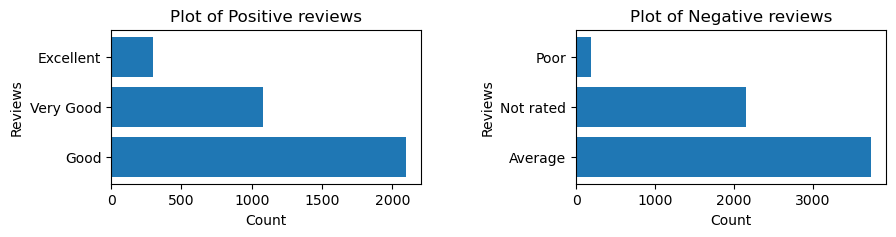

In [7]:
positive=data[data['Encoded rating']=='Positive']
negative=data[data['Encoded rating']=='Negative']

import matplotlib.pyplot as plt
plt.figure(figsize=(10,2))
plt.subplots_adjust(wspace=0.5) 
plt.subplot(1,2,1)

plt.barh(positive['Rating text'].value_counts().index,positive['Rating text'].value_counts().values,align='center')
plt.title("Plot of Positive reviews")
plt.xlabel("Count")
plt.ylabel("Reviews")

plt.subplot(1,2,2)
plt.barh(negative['Rating text'].value_counts().index,negative['Rating text'].value_counts().values,align='center')
plt.title("Plot of Negative reviews")
plt.xlabel("Count")
plt.ylabel("Reviews")
plt.show()

In [8]:
print("The most common positive review is",positive['Rating text'].value_counts().index[0])
print("The most common negative review is",negative['Rating text'].value_counts().index[0])

The most common positive review is Good
The most common negative review is Average


In [9]:
review_length=[len(str(x)) for x in data['Rating text']]

In [10]:
#Calculate the average length of reviews and explore if there is a relationship between review length and rating.
data['Review length']=review_length

In [11]:
data['Review length'].value_counts()

Review length
7    3737
9    3528
4    2286
Name: count, dtype: int64

In [12]:
data1=data[data['Aggregate rating']!=0.0]
data1.groupby('Review length')['Aggregate rating'].mean()

Review length
4    3.570691
7    3.051619
9    4.275362
Name: Aggregate rating, dtype: float64

In [13]:
corr=data1['Review length'].corr(data1['Aggregate rating'])
print("Correlation between Review length and Aggregate rating is %.2f"%(corr))

Correlation between Review length and Aggregate rating is 0.19


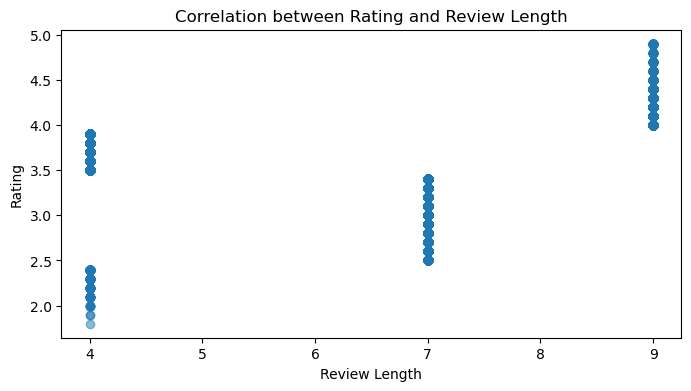

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.scatter(data1['Review length'],data1['Aggregate rating'],alpha=0.5)
plt.ylabel('Rating')
plt.xlabel('Review Length')
plt.title('Correlation between Rating and Review Length')
plt.show()

# Task 2

In [15]:
#Identify the restaurants with the highest and lowest number of votes

In [16]:
data2=data[data['Votes']!=0.0]
print("Highest number of votes is ",data2['Votes'].max())
print("Lowest number of votes is ",data2['Votes'].min())

Highest number of votes is  10934
Lowest number of votes is  1


In [17]:
votes=data2['Votes'].sort_values(ascending=False)
votes

728     10934
735      9667
3994     7931
2412     7574
739      6907
        ...  
4811        1
4804        1
9032        1
4802        1
3969        1
Name: Votes, Length: 8457, dtype: int64

In [18]:
vote_max=data[data['Votes']==data['Votes'].max()]
print("Restaurants with highest votes are")
vote_max

Restaurants with highest votes are


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Encoded rating,Review length
728,51705,Toit,1,Bangalore,"298, Namma Metro Pillar 62, 100 Feet Road, Ind...",Indiranagar,"Indiranagar, Bangalore",77.640709,12.979166,"Italian, American, Pizza",...,No,No,No,4,4.8,Dark Green,Excellent,10934,Positive,9


In [19]:
vote_min=data[data['Votes']==data['Votes'].min()]
print("Number of restaurants with lowest votes:",len(vote_min))
print("Restaurants with lowest votes are")
vote_min.head()

Number of restaurants with lowest votes: 1094
Restaurants with lowest votes are


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Encoded rating,Review length
69,6710645,Cantinho da Gula,30,S��o Paulo,"Rua Pedroso Alvarenga, 522, Itaim Bibi, S��o P...",Itaim Bibi,"Itaim Bibi, S��o Paulo",-46.675667,-23.581000,Brazilian,...,No,No,No,2,0.0,White,Not rated,0,Negative,9
874,18433852,The Chaiwalas,1,Faridabad,"Sector 21 A, Asian Hospital, Badhkal Chowk, Ba...",Badkal Lake,"Badkal Lake, Faridabad",77.300088,28.426284,Cafe,...,No,No,No,1,0.0,White,Not rated,0,Negative,9
879,18465871,Fusion Food Corner,1,Faridabad,"158/7, Opposite DDA Flat, Pul Pehlad Pur, Char...",Charmwood Village,"Charmwood Village, Faridabad",0.000000,0.000000,"North Indian, Chinese",...,No,No,No,1,0.0,White,Not rated,0,Negative,9
880,18472646,Punjabi Rasoi,1,Faridabad,"1, Deepak Complex, Eros Charmwood Village, Far...",Charmwood Village,"Charmwood Village, Faridabad",77.292431,28.492325,North Indian,...,No,No,No,1,0.0,White,Not rated,0,Negative,9
887,18471268,Baskin Robbin,1,Faridabad,"Ground Floor, Crown Interiorz Mall, Sector 35,...","Crown Interiorz Mall, Sector 35, Faridabad","Crown Interiorz Mall, Sector 35, Faridabad, Fa...",77.307448,28.469594,Desserts,...,No,No,No,1,0.0,White,Not rated,0,Negative,9


In [20]:
#Analyze if there is a correlation between the number of votes and the rating of a restaurant.

In [21]:
corr=data2['Votes'].corr(data1['Aggregate rating'])
print("Correlation between the number of votes and Aggregate rating is %.2f"%(corr))

Correlation between the number of votes and Aggregate rating is 0.41


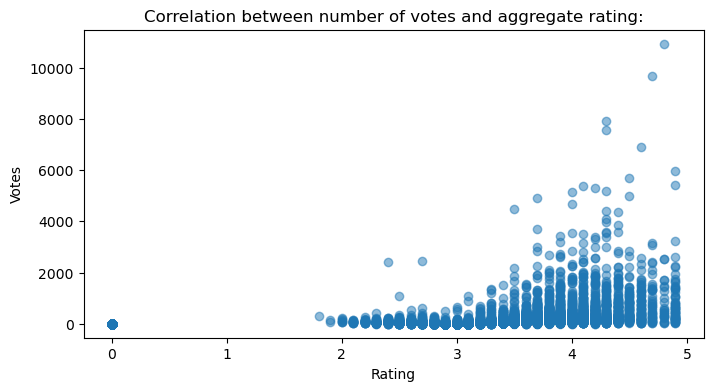

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.scatter(data2['Aggregate rating'],data2['Votes'],alpha=0.5)
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Correlation between number of votes and aggregate rating:')
plt.show()

# Task 3

In [23]:
#Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

In [24]:
df=data[['Price range','Has Online delivery','Has Table booking']]


In [25]:
df['Has Online delivery']=df['Has Online delivery'].replace(['Yes','No'],[1,0])
df['Has Table booking']=df['Has Table booking'].replace(['Yes','No'],[1,0])
df


,Price range,Has Online delivery,Has Table booking
0,3,0,1
1,3,0,1
2,4,0,1
3,4,0,0
4,4,0,1
...,...,...,...
9546,3,0,0
9547,3,0,0
9548,4,0,0
9549,4,0,0


In [26]:
corr=df.corr()
corr

,Price range,Has Online delivery,Has Table booking
Price range,1.000000,0.077918,0.501925
Has Online delivery,0.077918,1.000000,0.101224
Has Table booking,0.501925,0.101224,1.000000


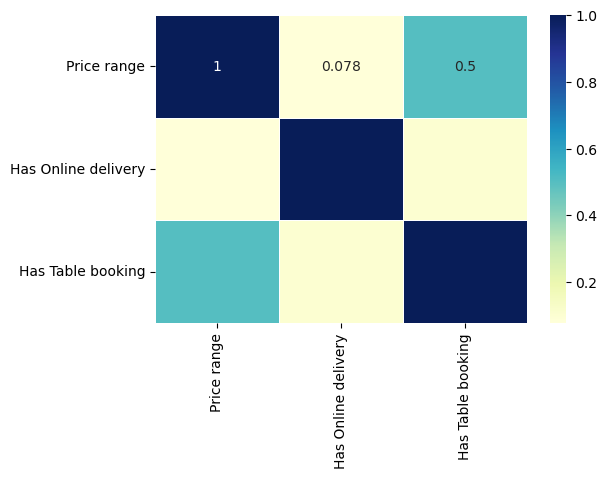

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.heatmap(corr,annot=True,cbar=True,cmap='YlGnBu',linewidths=0.5)
plt.show()

In [28]:
corr=df[['Has Online delivery','Has Table booking']].corrwith(df['Price range'])
corr

Has Online delivery    0.077918
Has Table booking      0.501925
dtype: float64

This means restaurants with availability of online delivery has a weak correlation with Price range.
And restaurants with availabilty of table booking has a stronger correlation with Price range.64

In [29]:
#Determine if higher-priced restaurants are more likely to offer these services.

In [30]:
data['Price range'].value_counts().sort_values()

Price range
4     586
3    1408
2    3113
1    4444
Name: count, dtype: int64

In [31]:
df=data[['Price range','Has Online delivery','Has Table booking']]
max_range=df['Price range'].max()

In [32]:
df[df['Price range']==max_range].value_counts()

Price range  Has Online delivery  Has Table booking
4            No                   No                   299
                                  Yes                  234
             Yes                  Yes                   40
                                  No                    13
Name: count, dtype: int64

In [33]:
df[(df['Price range']==max_range) & (df['Has Online delivery']=='Yes') & (df['Has Table booking']=='Yes')].value_counts()

Price range  Has Online delivery  Has Table booking
4            Yes                  Yes                  40
Name: count, dtype: int64

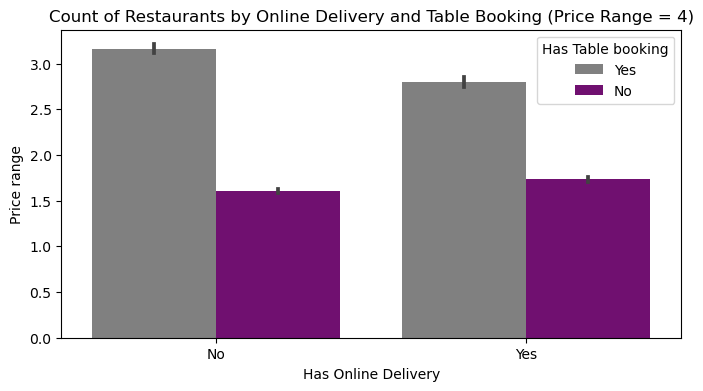

In [34]:
value_counts =df[ df['Price range']==4].value_counts()
palette = {'No': 'purple', 'Yes': 'grey'}
plt.figure(figsize=(8, 4))
sns.barplot(x='Has Online delivery', y=df['Price range'], hue='Has Table booking', data=df,palette=palette)
plt.title('Count of Restaurants by Online Delivery and Table Booking (Price Range = 4)')
plt.xlabel('Has Online Delivery')
plt.ylabel('Price range')
plt.show()

1. Restaurants that do not offer online delivery and also do not offer table booking have very low price range.
2. Restaurants that do not offer online delivery and offer table booking has very high price range.